In [1]:
# Loading modules

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import skfda

# Berkeley growth study data

"Hello world" data for registration.

* http://www.psych.mcgill.ca/faculty/ramsay/datasets.html (access denied...)
* https://rdrr.io/cran/fda/man/growth.html (R example for package FDA-functional data analysis)

For Python: 
* https://github.com/GAA-UAM/scikit-fda
* https://fda.readthedocs.io/en/stable/auto_tutorial/plot_introduction.html#sphx-glr-auto-tutorial-plot-introduction-py



**The references below have examples with the Berkely growth data**
* Anuj, S., Wei, W., Sebastian, K., Eric, K. & S., M., J. Registration of Functional Data Using Fisher-Rao Metric. Arxiv (2011).
* https://fda.readthedocs.io/en/stable/auto_examples/plot_elastic_registration.html
  

**ATTENTION**
* use Leo's environment FDA to run this notebook!


---

## Elastic Registration of the Growth dataset
* example from: https://fda.readthedocs.io/en/stable/auto_examples/plot_elastic_registration.html


**Obs** - the example cites the folowing works: 
1. Srivastava, Anuj & Klassen, Eric P. (2016). Functional and shape data analysis. In Functional Data and Elastic Registration (pp. 73-122). Springer.

2. Tucker, J. D., Wu, W. and Srivastava, A. (2013). Generative Models for Functional Data using Phase and Amplitude Separation. Computational Statistics and Data Analysis, Vol. 61, 50-66.

3. J. S. Marron, James O. Ramsay, Laura M. Sangalli and Anuj Srivastava (2015). Functional Data Analysis of Amplitude and Phase Variation. Statistical Science 2015, Vol. 30, No. 4



### Getting data

In [2]:
from skfda.datasets import fetch_growth, make_multimodal_samples
from skfda.preprocessing.registration import ElasticRegistration
from skfda.preprocessing.registration.elastic import elastic_mean

In [3]:
growth = fetch_growth() # loading data

## DFA package

We now show the aligned curves:

Leo's note: fixing vertical scale to \[-5, 35\] to match Srivastava 2011 paper.

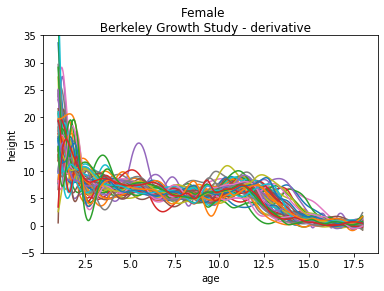

In [31]:
# Female data

class_data = 1 # Female

class_lbls = ["Male", "Female"]


# velocity functions #########################################

# Select only one sex
fd = growth['data'][growth['target'] == class_data]

# Obtain velocity curves
fd.interpolation = skfda.representation.interpolation.SplineInterpolation(3)
fd_derivative = fd.to_grid(np.linspace(*fd.domain_range[0], 200)).derivative()
fd_derivative = fd_derivative.to_grid(np.linspace(*fd.domain_range[0], 50))
fd_derivative.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative "
fd_derivative.plot();
plt.ylim(-5,35);

(-5.0, 35.0)

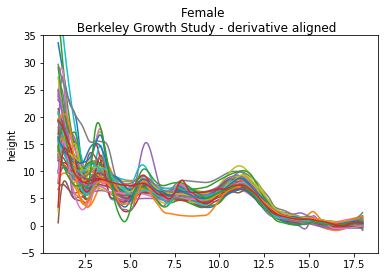

In [32]:
# Aligned functions #########################################

elastic_registration = ElasticRegistration()

fd_align = elastic_registration.fit_transform(fd_derivative)
fd_align.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative aligned"

fd_align.plot();
plt.ylim(-5,35)

In [45]:
fd_derivative.grid_points[0] == fd_align.grid_points[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [38]:
fd_align.grid_points

(array([ 1.        ,  1.34693878,  1.69387755,  2.04081633,  2.3877551 ,
         2.73469388,  3.08163265,  3.42857143,  3.7755102 ,  4.12244898,
         4.46938776,  4.81632653,  5.16326531,  5.51020408,  5.85714286,
         6.20408163,  6.55102041,  6.89795918,  7.24489796,  7.59183673,
         7.93877551,  8.28571429,  8.63265306,  8.97959184,  9.32653061,
         9.67346939, 10.02040816, 10.36734694, 10.71428571, 11.06122449,
        11.40816327, 11.75510204, 12.10204082, 12.44897959, 12.79591837,
        13.14285714, 13.48979592, 13.83673469, 14.18367347, 14.53061224,
        14.87755102, 15.2244898 , 15.57142857, 15.91836735, 16.26530612,
        16.6122449 , 16.95918367, 17.30612245, 17.65306122, 18.        ]),)

In [36]:
print(fd_align.data_matrix.shape)

(54, 50, 1)

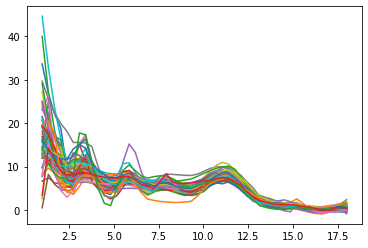

In [42]:
plt.plot(fd_align.grid_points[0], fd_align.data_matrix[:,:,0].T);

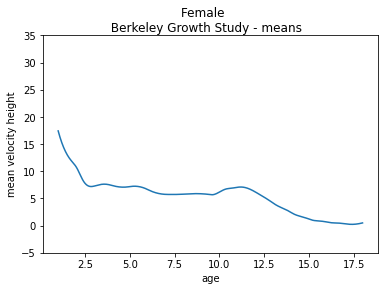

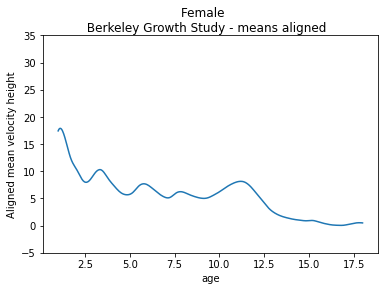

In [6]:
# ploting the means #########################################
means = skfda.exploratory.stats.mean(fd_derivative)
means.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - means"
means.axes_labels = ('age',"mean velocity height")

means.plot();
plt.ylim(-5,35)



means_align = skfda.exploratory.stats.mean(fd_align)
means_align.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - means aligned"
means_align.axes_labels = ('age',"Aligned mean velocity height")

means_align.plot();
plt.ylim(-5,35);

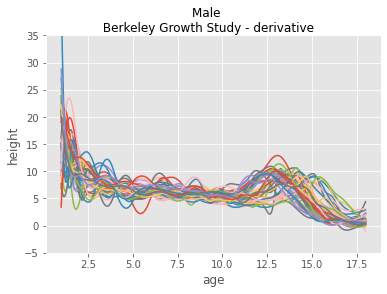

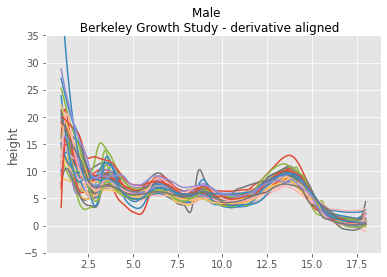

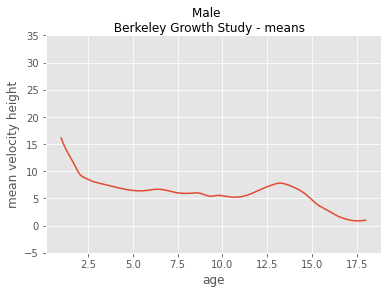

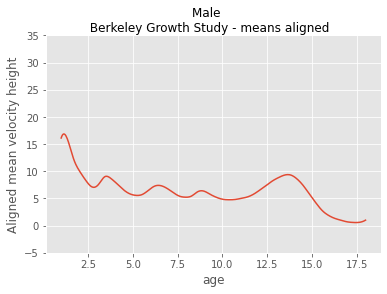

In [43]:
# Male data

class_data = 0 # male

class_lbls = ["Male", "Female"]


# velocity functions #########################################

# Select only one sex
fd = growth['data'][growth['target'] == class_data]

# Obtain velocity curves
fd.interpolation = skfda.representation.interpolation.SplineInterpolation(3)
fd_derivative = fd.to_grid(np.linspace(*fd.domain_range[0], 200)).derivative()
fd_derivative = fd_derivative.to_grid(np.linspace(*fd.domain_range[0], 50))
fd_derivative.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative "
fd_derivative.plot();
plt.ylim(-5,35)


# Aligned functions #########################################

elastic_registration = ElasticRegistration()

fd_align = elastic_registration.fit_transform(fd_derivative)
fd_align.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative aligned"

fd_align.plot();
plt.ylim(-5,35)



# ploting the means #########################################
means = skfda.exploratory.stats.mean(fd_derivative)
means.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - means"
means.axes_labels = ('age',"mean velocity height")

means.plot();
plt.ylim(-5,35)



means_align = skfda.exploratory.stats.mean(fd_align)
means_align.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - means aligned"
means_align.axes_labels = ('age',"Aligned mean velocity height")

means_align.plot();
plt.ylim(-5,35);

### Inspecting other means

In [34]:
# Female data

class_data = 1 # Female

class_lbls = ["Male", "Female"]

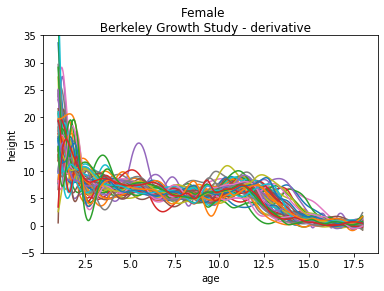

In [35]:
# velocity functions #########################################

# Select only one sex
fd = growth['data'][growth['target'] == class_data]

# Obtain velocity curves
fd.interpolation = skfda.representation.interpolation.SplineInterpolation(3)
fd_derivative = fd.to_grid(np.linspace(*fd.domain_range[0], 200)).derivative()
fd_derivative = fd_derivative.to_grid(np.linspace(*fd.domain_range[0], 50))
fd_derivative.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative "
fd_derivative.plot();
plt.ylim(-5,35);

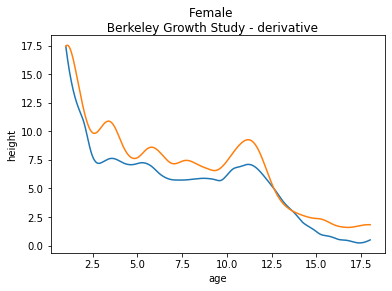

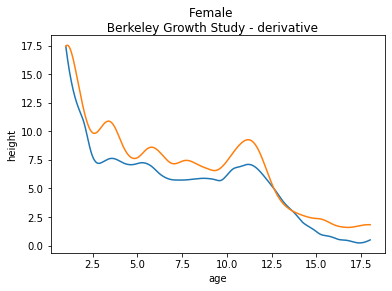

In [44]:
fig = fd_derivative.mean().plot(label="L2 mean")
elastic_mean(fd_derivative).plot(fig=fig, label="Elastic mean")
#fig.legend()
#fig.axes[0].legend()

* what other metrics can be found in FDA package?

In [45]:
import skfda.preprocessing.registration.elastic as pre

In [ ]:
pre.

### Extracting data from FDataGrid

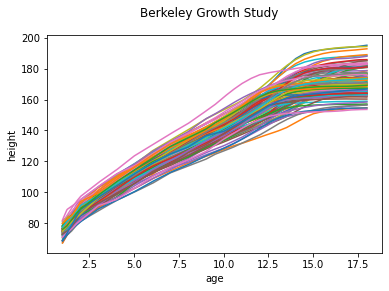

In [22]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)

X.plot();

**data_matrix** – a matrix where each entry of the first axis contains the values of a functional datum evaluated at the points of discretisation.

In [26]:
X.data_matrix.shape

(93, 31, 1)

**grid_points** – 2 dimension matrix where each row contains the points of dicretisation for each axis of data_matrix.



In [31]:
print(X.grid_points[0].shape)
X.grid_points[0]

(31,)


array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
       12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
       16.5 , 17.  , 17.5 , 18.  ])

In [3]:
# classes. In this case, "male" and "female"
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [46]:
N_samples = X.data_matrix.shape[0] # subjects
N_obs     = X.data_matrix.shape[1] # time points


df_grouth = pd.DataFrame(X.data_matrix[:,:,0].T, columns=["S%i"%i for i in range(N_samples)])

df_grouth["age"] = X.grid_points[0]

df_grouth.head()

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S84,S85,S86,S87,S88,S89,S90,S91,S92,age
0,81.3,76.2,76.8,74.1,74.2,76.8,72.4,73.8,75.4,78.8,...,71.3,73.0,71.1,74.6,74.9,77.6,68.6,79.9,76.1,1.00
1,84.2,80.4,79.8,78.4,76.3,79.1,76.0,78.7,81.0,83.3,...,74.4,75.0,73.7,78.0,78.1,81.1,73.6,82.6,78.4,1.25
2,86.4,83.2,82.6,82.6,78.3,81.1,79.4,83.0,84.9,87.0,...,77.4,77.6,76.2,81.0,80.6,84.0,78.6,84.8,82.3,1.50
3,88.9,85.4,84.7,85.4,80.3,84.4,82.0,85.8,87.9,89.6,...,80.0,81.7,79.4,83.6,83.4,87.2,83.6,88.6,86.0,1.75
4,91.4,87.6,86.7,88.1,82.2,87.4,84.2,88.4,90.0,91.4,...,82.6,86.4,81.8,86.2,86.0,91.4,88.9,94.0,89.2,2.00


In [47]:
df_grouth.melt(id_vars=["age"],var_name="Sample", value_name="Height")

,age,Sample,Height
0,1.00,S0,81.3
1,1.25,S0,84.2
2,1.50,S0,86.4
3,1.75,S0,88.9
4,2.00,S0,91.4
...,...,...,...
2878,16.00,S92,168.5
2879,16.50,S92,168.5
2880,17.00,S92,168.6
2881,17.50,S92,168.9


In [55]:
N_samples = X.data_matrix.shape[0] # subjects
N_obs     = X.data_matrix.shape[1] # time points


df_grouth = pd.DataFrame(X.data_matrix[:,:,0], 
                         columns=X.grid_points[0])

df_grouth["class"] = y
df_grouth["Sample"] =["S%i"%i for i in range(N_samples)]
                        
df_grouth.head()

,1.0,1.25,1.5,1.75,2.0,3.0,4.0,5.0,6.0,7.0,...,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,class,Sample
0,81.3,84.2,86.4,88.9,91.4,101.1,109.5,115.8,121.9,130.0,...,189.6,191.3,192.1,192.8,193.2,193.8,194.3,195.1,0,S0
1,76.2,80.4,83.2,85.4,87.6,97.0,104.6,112.3,118.9,125.0,...,159.2,163.3,167.7,171.5,174.3,176.1,177.4,178.7,0,S1
2,76.8,79.8,82.6,84.7,86.7,94.2,100.4,107.1,112.3,118.6,...,163.3,166.8,167.8,168.8,169.8,170.9,171.2,171.5,0,S2
3,74.1,78.4,82.6,85.4,88.1,98.6,104.4,111.0,116.3,123.2,...,172.5,176.3,178.5,179.8,180.7,181.4,181.6,181.8,0,S3
4,74.2,76.3,78.3,80.3,82.2,89.4,96.9,104.1,110.7,115.8,...,165.1,168.5,170.4,171.6,172.4,172.5,172.5,172.5,0,S4


In [60]:
df_tidy = df_grouth.melt(id_vars=["class", "Sample"],var_name="age", value_name="Height")
df_tidy

,class,Sample,age,Height
0,0,S0,1.0,81.3
1,0,S1,1.0,76.2
2,0,S2,1.0,76.8
3,0,S3,1.0,74.1
4,0,S4,1.0,74.2
...,...,...,...,...
2878,1,S88,18.0,169.8
2879,1,S89,18.0,173.5
2880,1,S90,18.0,166.8
2881,1,S91,18.0,168.6


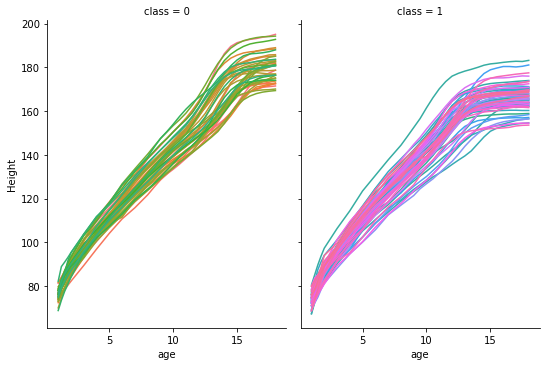

In [64]:
sns.relplot(
    data=df_tidy,
    x="age", y="Height",
    hue="Sample", col="class",
    kind="line", 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
    legend=False,
);

### ElasticRegistration Docs

Init signature:
ElasticRegistration(
    template: 'Union\[FDataGrid, _MeanType]' = <function elastic_mean at 0x7f6f255ce710>,
    penalty: 'float' = 0,
    output_points: 'Optional\[ArrayLike]' = None,
    grid_dim: 'int' = 7,
) -> 'None'
Docstring:     
Align a FDatagrid using the SRSF framework.

Let :math:`f` be a function of the functional data object wich will be
aligned to the template :math:`g`. Calculates the warping wich minimises
the Fisher-Rao distance between :math:`g` and the registered function
$f^*(t)=f(\gamma^*(t))=f \circ \gamma^*$.

$$
    \gamma^* = argmin_{\gamma \in \Gamma} d_{\lambda}(f \circ
    \gamma, g)$$

Where $d_{\lambda}$ denotes the extended Fisher-Rao distance with a
penalty term, used to control the amount of warping.

$$
    d_{\lambda}^2(f \circ \gamma, g) = \| SRSF(f \circ \gamma)
    \sqrt{\dot{\gamma}} - SRSF(g)\|_{\mathbb{L}^2}^2 + \lambda
    \mathcal{R}(\gamma)$$

In the implementation it is used as penalty term

$$
    \mathcal{R}(\gamma) = \|\sqrt{\dot{\gamma}}- 1 \|_{\mathbb{L}^2}^2$$

Wich restrict the amount of elasticity employed in the alignment.

The registered function $f^*(t)$ can be calculated using the
composition $f^*(t)=f(\gamma^*(t))$.

If the template is not specified it is used the **Karcher mean** of the set of
functions under the elastic metric to perform the alignment, also known as
`elastic mean`, wich is the local minimum of the sum of squares of elastic
distances. See :func:`~elastic_mean`.

In :footcite:`srivastava+klassen_2016_analysis_elastic` are described
extensively the algorithms employed and the SRSF framework.

Args:
    template (str, :class:`FDataGrid` or callable, optional): Template to
        align the curves. Can contain 1 sample to align all the curves to
        it or the same number of samples than the fdatagrid. By default
        `elastic mean`, in which case :func:`elastic_mean` is called.
    penalty_term (float, optional): Controls the amount of elasticity.
        Defaults to 0.
    output_points (array_like, optional): Set of points where the
        functions are evaluated, by default uses the sample points of the
        fdatagrid which will be transformed.
    grid_dim (int, optional): Dimension of the grid used in the DP
        alignment algorithm. Defaults 7.

Attributes:
    template\_: Template learned during fitting,
        used for alignment in :meth:`transform`.
    warping\_: Warping applied during the last
        transformation.

References:
    .. footbibliography::

Examples:
    Elastic registration of with train/test sets.

    >>> from skfda.preprocessing.registration import \
    ...                                             ElasticRegistration
    >>> from skfda.datasets import make_multimodal_samples
    >>> X_train = make_multimodal_samples(n_samples=15, random_state=0)
    >>> X_test = make_multimodal_samples(n_samples=3, random_state=1)

    Fit the transformer, which learns the elastic mean of the train
    set as template.

    >>> elastic_registration = ElasticRegistration()
    >>> elastic_registration.fit(X_train)
    ElasticRegistration(...)

    Registration of the test set.

    >>> elastic_registration.transform(X_test)
    FDataGrid(...)
File:           ~/anaconda3/envs/FDA/lib/python3.7/site-packages/skfda/preprocessing/registration/elastic.py
Type:           ABCMeta
Subclasses:     

## fdasrsf Package

* https://fdasrsf-python.readthedocs.io/en/latest/
* https://github.com/jdtuck/fdasrsf_python

In [7]:
import fdasrsf as fs

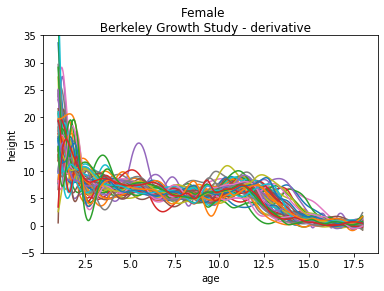

In [8]:
# Female data

class_data = 1 # Female

class_lbls = ["Male", "Female"]


# velocity functions #########################################

# Select only one sex
fd = growth['data'][growth['target'] == class_data]

# Obtain velocity curves
fd.interpolation = skfda.representation.interpolation.SplineInterpolation(3)
fd_derivative = fd.to_grid(np.linspace(*fd.domain_range[0], 200)).derivative()
fd_derivative = fd_derivative.to_grid(np.linspace(*fd.domain_range[0], 50))
fd_derivative.dataset_name = f"{class_lbls[class_data]} \n {fd.dataset_name} - derivative "
fd_derivative.plot();
plt.ylim(-5,35);

In [9]:
X = fd_derivative
print(X.shape)

(54,)


In [13]:
N_samples = X.data_matrix.shape[0] # subjects
N_obs     = X.data_matrix.shape[1] # time points


df_grouth = pd.DataFrame(X.data_matrix[:,:,0].T, columns=["S%i"%i for i in range(N_samples)])

df_grouth["age"] = X.grid_points[0]

df_grouth.head()

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S45,S46,S47,S48,S49,S50,S51,S52,S53,age
0,20.595467,13.967524,12.699538,13.028850,19.424170,6.656871,24.270094,17.392882,16.737304,12.633122,...,11.970933,8.277533,12.482865,14.248854,15.917585,16.032851,19.676310,14.560796,3.427017,1.000000
1,11.891257,15.347649,14.815923,10.752850,12.100586,18.857756,14.477431,18.646300,11.263974,13.453342,...,12.198696,9.769242,9.584625,12.216501,9.894247,11.665445,20.079034,8.349009,15.511048,1.346939
2,9.118590,18.759541,8.789730,15.063857,12.199974,7.436471,13.533583,15.470123,9.631913,13.468065,...,10.233170,17.902934,12.500644,10.210513,11.245995,14.051209,20.531588,17.758336,14.231506,1.693878
3,7.875872,8.454130,6.158005,11.284173,10.429669,7.042845,10.189414,12.661704,12.326394,10.736814,...,9.950277,15.195228,9.398998,10.613701,10.385561,14.221880,17.392355,17.294237,11.376580,2.040816
4,8.348959,4.536041,6.630186,8.361500,6.963985,7.523030,9.534020,9.161624,7.525706,11.229889,...,8.824921,6.410271,10.560578,10.638956,10.831027,6.344634,7.929576,5.031243,9.025075,2.387755


<AxesSubplot:xlabel='age'>

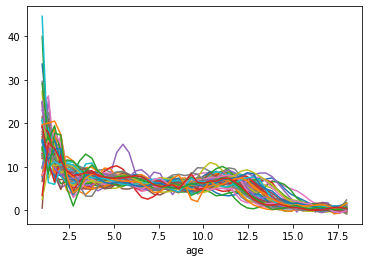

In [11]:
df_grouth.plot(x="age", legend=False)

In [16]:
f = np.copy(df_grouth.iloc[:,:-1].values)
print(f.shape)

(50, 54)


In [20]:
t_vec = np.copy(df_grouth["age"].values)

In [17]:
# this class provides alignment methods for functional data using the SRVF framework

obj = fs.fdawarp(f,t_vec)

In [18]:
# This function aligns a collection of functions using the elastic square-root slope (srsf) framework.

obj.srsf_align(parallel=True, smoothdata=True)

Initializing...
Compute Karcher Mean of 54 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


In [21]:
# extracting objects (optional: saving)

gamma  = np.copy(obj.gam) # warp functions vectors
f_w    = np.copy(obj.fn)
f_mean = np.copy(obj.fmean) #

In [28]:
# Alignment by hand

from scipy.interpolate import CubicSpline

def fun_inverse_gamma(t_vec, t_warped):
    """
    """
    t_w0, t_wf = np.min(t_warped), np.max(t_warped)
    x_temp = np.linspace(t_w0, t_wf,len(t_warped))

    gamma_inv = CubicSpline(t_warped, t_vec)
    
    return gamma_inv(x_temp)


t0, tf = np.copy(t_vec[0]), np.copy(t_vec[-1])
t_vec2 = np.array([(tf - t0) * gamma[:, k]+ t0 for k in range(f.shape[1])]).T

t_warped_inv = np.array([fun_inverse_gamma(t_vec, t_vec2[:,i]) for i in range(t_vec2.shape[1])]).T

print(t_vec2.shape, t_warped_inv.shape)

(50, 54) (50, 54)


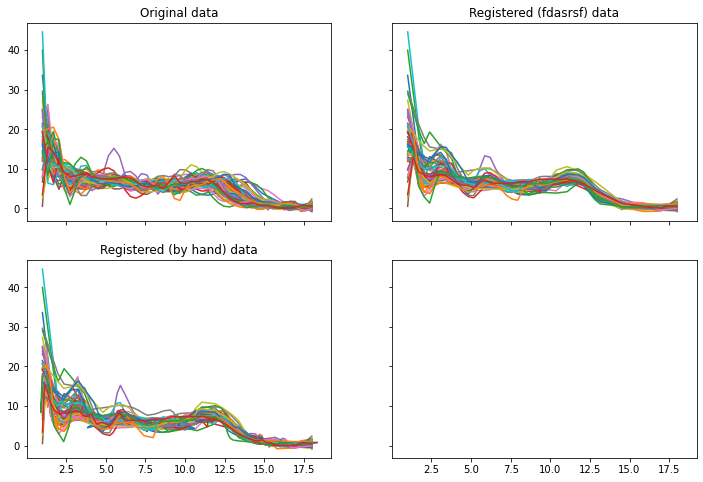

In [29]:
# plotting | envelops

fig, axes = plt.subplots(2,2,figsize=(12,8), sharex=True, sharey=True)
axes = axes.ravel()
i=0
axes[i].set_title("Original data")
axes[i].plot(t_vec,f);


i+=1
axes[i].set_title("Registered (fdasrsf) data")
axes[i].plot(t_vec,f_w);

i+=1
axes[i].set_title("Registered (by hand) data")
axes[i].plot(t_warped_inv,f);

In [30]:
print((np.diff(gamma, axis=0)<0).any())
print((np.diff(t_warped_inv, axis=0)<0).any())


False
True


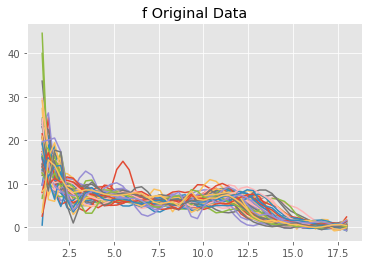

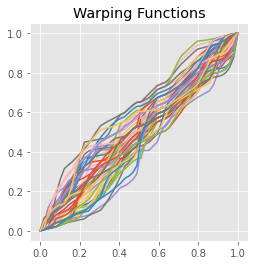

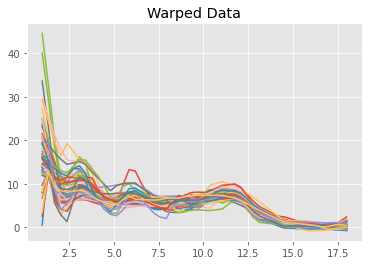

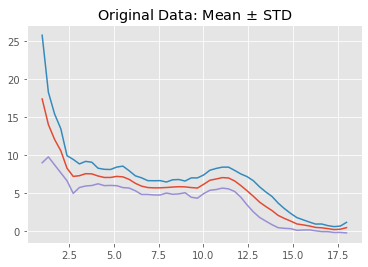

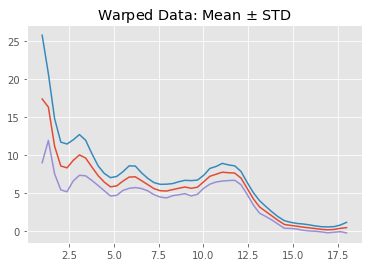

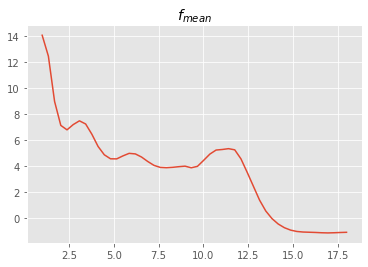

In [39]:
obj.plot()